<a href="https://colab.research.google.com/github/patbaa/demo_notebooks/blob/master/ML_model_zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # np array & math
import pandas as pd # to handle data table
import seaborn as sns # high-level plotting package, built on matplotlib
import matplotlib.pyplot as plt # lower-level plotting package

from collections import Counter
# super useful function to count objects in lists

%matplotlib inline
# to have the plots displayed within the notebook


from sklearn import datasets, cluster
from sklearn import neighbors, ensemble, tree, linear_model
from sklearn import model_selection, metrics
# sklearn in the most popular machine learning library in python

In [0]:
data = datasets.load_breast_cancer()

# Breast Cancer Wisconsin (Diagnostic) Data Set

Fine needle aspirate (FNA) of a breast mass. The dataset contains extracted information of cell nuclei from digitized images.

A few extracted information:
 - radius
 - texture
 - perimeter
 - area
 - smoothness
 - compactness

 The target variable is binary, the diagnosis (M malignant - 0, B benign - 1).

<img src="https://upload.wikimedia.org/wikipedia/commons/6/65/Pancreas_FNA%3B_adenocarcinoma_vs._normal_ductal_epithelium_%28400x%29_%28322383635%29.jpg" align="middle">

Image: By Ed Uthman from Houston, TX, USA - Pancreas FNA; adenocarcinoma vs. normal ductal epithelium (400x)Uploaded by CFCF, CC BY 2.0, https://commons.wikimedia.org/w/index.php?curid=30103637


# Get familiar with the data
 - missing values
 - range of features
 - strange behaviours, outliers

In [3]:
X = pd.DataFrame(data['data'])
X.columns = data['feature_names']
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
Counter(data['target'])

Counter({0: 212, 1: 357})

In [5]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [6]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# NAs: 0


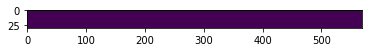

In [7]:
plt.imshow(X.T.isna())
print(f'# NAs: {X.isna().sum().sum()}')

In [0]:
X['target'] = data.target

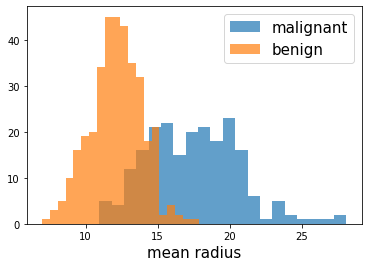

In [9]:
plt.hist(X[X['target'] == 0]['mean radius'], alpha = 0.7, label='malignant', bins=20)
plt.hist(X[X['target'] == 1]['mean radius'], alpha = 0.7, label='benign', bins=20)
plt.xlabel('mean radius', fontsize=15)
plt.legend(fontsize=15)

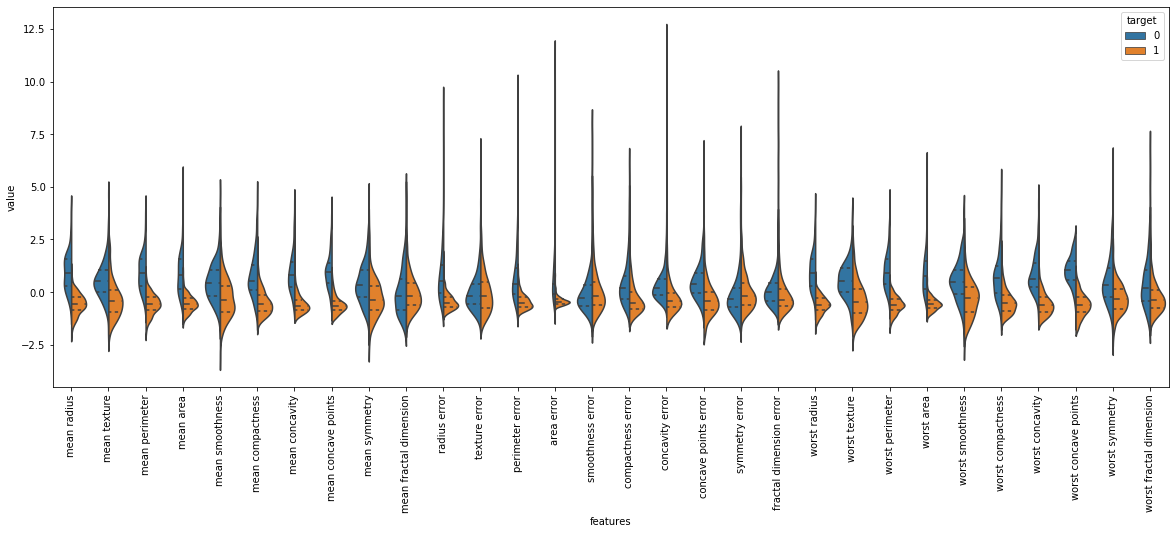

In [10]:
plt.figure(figsize=(20, 7))
data2 = pd.concat([X.target, ((X-X.mean())/X.std()).drop('target', 1)], axis=1)
data2 = pd.melt(data2,id_vars="target",
                    var_name="features",
                    value_name='value')
sns.violinplot(x="features", y="value", hue="target", data=data2, split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

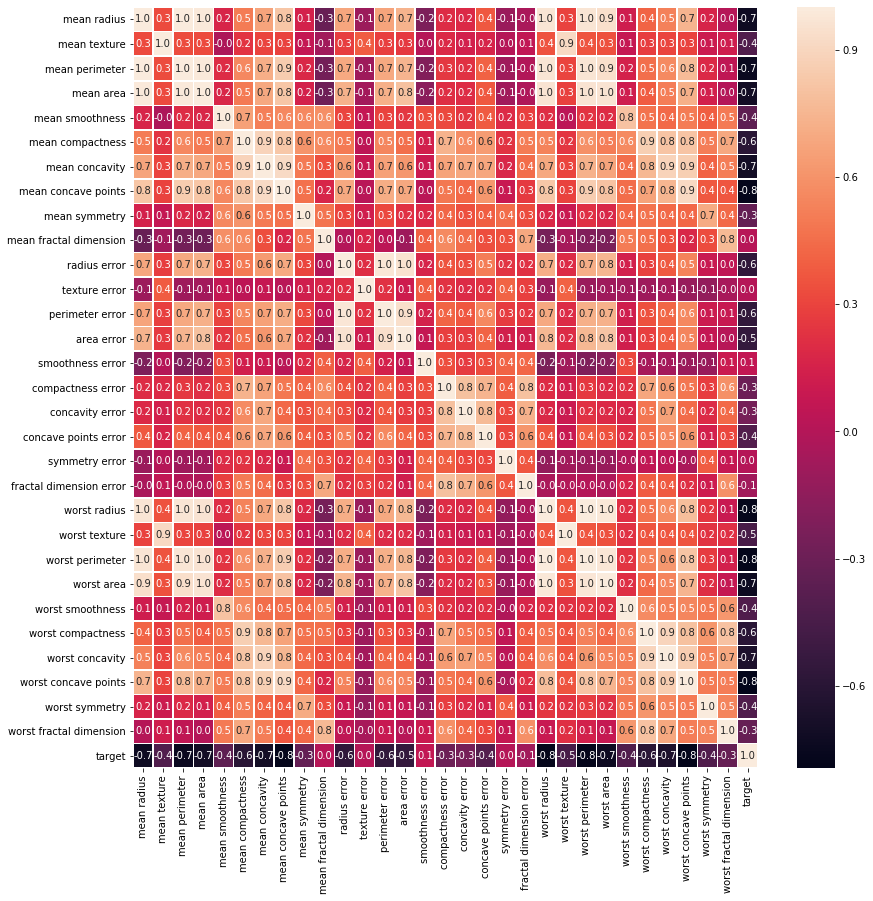

In [11]:
plt.figure(figsize=(14, 14))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f')

<Figure size 1008x1008 with 0 Axes>

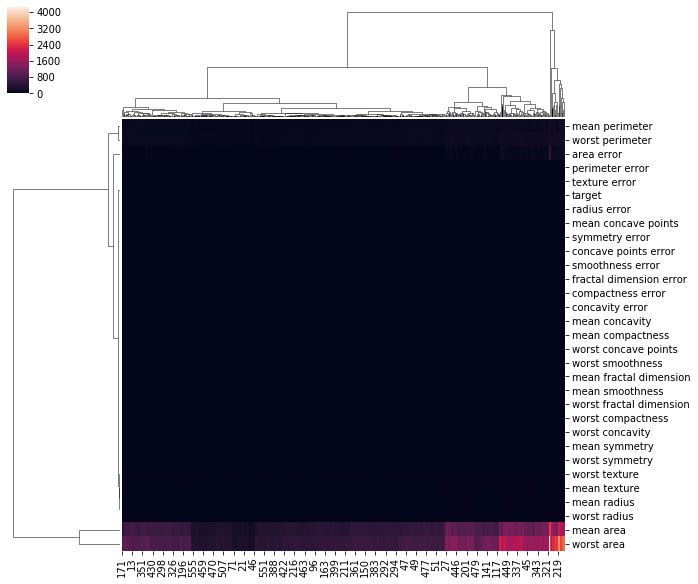

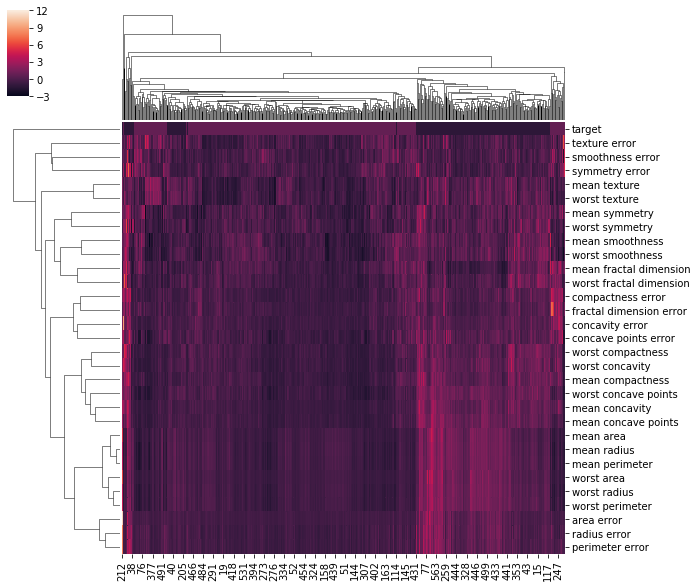

In [12]:
plt.figure(figsize=(14, 14))
sns.clustermap(X.T)
sns.clustermap(((X-X.mean())/X.std()).T)

# Impute missing data when needed **always with care**
 - is the missingness random?
 - is the missingness portion significant?
 - remove feature / samples
 - fill with mean / median
 - new feature: is_missing ?

# Modeling
 - KMeans clustering - 2 clusters
 - Decision tree classifier
 - Random forest with feature importance 
 - Logistic regression

In [0]:
kmeans = cluster.KMeans(n_clusters=2, random_state=42)
rf     = ensemble.RandomForestClassifier(random_state=42)
dt     = tree.DecisionTreeClassifier()
lr     = linear_model.LogisticRegression()
knn    = neighbors.KNeighborsClassifier(5) 

# random states are important for reproducibility

## KMeans is unsupervised, the rest is supervised

In [15]:
kmeans_clusters = kmeans.fit_predict(X.drop('target', 1), X['target'])
(kmeans_clusters == X['target']).mean()

0.14586994727592267

KNN does not know which cluster is which!

In [16]:
kmeans_clusters = np.array([1 if i == 0 else 0 for i in kmeans_clusters])
(kmeans_clusters == X['target']).mean()


0.8541300527240774

Text(33.0, 0.5, 'label')

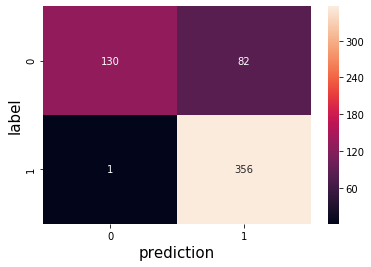

In [19]:
cm = metrics.confusion_matrix(y_true=X['target'],y_pred=kmeans_clusters)
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel('prediction', fontsize=15)
plt.ylabel('label', fontsize=15)

## Supervised models. Everything is with default values!
 - K-fold cross-validation, with K=5
 - Leave-one-out is when K=len(X)

In [20]:
rf_preds   = model_selection.cross_val_predict(rf, X.drop('target', 1), 
                               X['target'], method='predict_proba', cv=5)
tree_preds = model_selection.cross_val_predict(dt, X.drop('target', 1), 
                               X['target'], method='predict_proba', cv=5)
lr_preds   = model_selection.cross_val_predict(lr, X.drop('target', 1), 
                               X['target'], method='predict_proba', cv=5)
knn_preds  = model_selection.cross_val_predict(knn, X.drop('target', 1), 
                               X['target'], method='predict_proba', cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


# ConvergenceWarning...
 - increase iteration limit
 - scale data
 - learning rate

Text(0, 0.5, 'True Positive Rate')

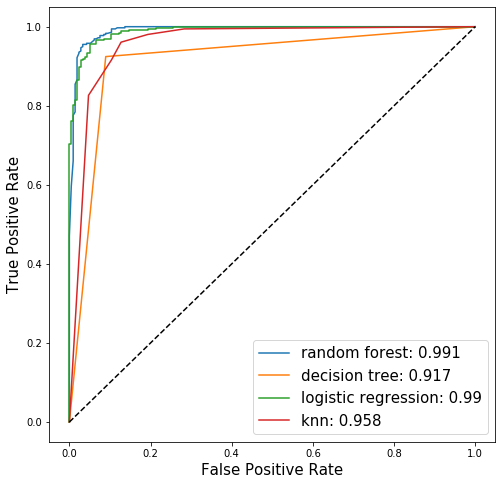

In [22]:
plt.figure(figsize=(8, 8))
for idx, preds in enumerate([rf_preds, tree_preds, lr_preds, knn_preds]):
    fpr, tpr, _ = metrics.roc_curve(y_score=preds[:,1], y_true=data['target'])
    auc = np.round(metrics.roc_auc_score(y_score=preds[:,1], y_true=data['target']), 3)
    plt.plot(fpr, tpr, label=['random forest', 'decision tree', 
                             'logistic regression', 'knn'][idx] + f': {auc}')
plt.legend(fontsize=15)
plt.plot([0, 1], [0, 1], '--', c='k')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)

## Why do we have just...
 - one break point for decision tree
 - a few break points for KNN?

**Remember: ROC curve is generated with sweeping the probability threshold! Can these models provide real, continuous probabilities?**


In [0]:
X = X.set_index('target')
X = (X - X.mean())/X.std()
X = X.reset_index()
rf_preds2   = model_selection.cross_val_predict(rf, X.drop('target', 1), 
                               X['target'], method='predict_proba', cv=5)
tree_preds2 = model_selection.cross_val_predict(dt, X.drop('target', 1), 
                               X['target'], method='predict_proba', cv=5)
lr_preds2   = model_selection.cross_val_predict(lr, X.drop('target', 1), 
                               X['target'], method='predict_proba', cv=5)
knn_preds2  = model_selection.cross_val_predict(knn, X.drop('target', 1), 
                               X['target'], method='predict_proba', cv=5)

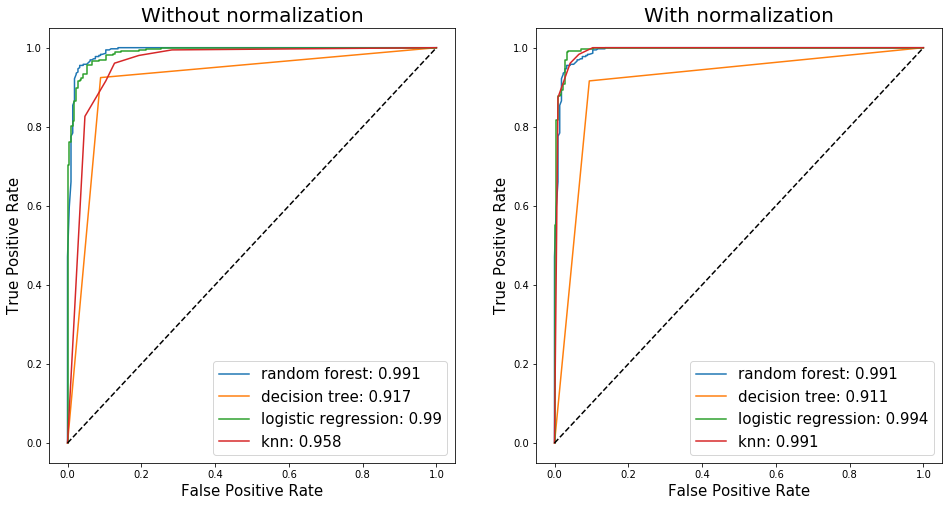

In [25]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
for idx, preds in enumerate([rf_preds, tree_preds, lr_preds, knn_preds]):
    fpr, tpr, _ = metrics.roc_curve(y_score=preds[:,1], y_true=data['target'])
    auc = np.round(metrics.roc_auc_score(y_score=preds[:,1], y_true=data['target']), 3)
    plt.plot(fpr, tpr, label=['random forest', 'decision tree', 
                             'logistic regression', 'knn'][idx] + f': {auc}')
plt.legend(fontsize=15)
plt.plot([0, 1], [0, 1], '--', c='k')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Without normalization', fontsize=20)

plt.subplot(122)
for idx, preds in enumerate([rf_preds2, tree_preds2, lr_preds2, knn_preds2]):
    fpr, tpr, _ = metrics.roc_curve(y_score=preds[:,1], y_true=data['target'])
    auc = np.round(metrics.roc_auc_score(y_score=preds[:,1], y_true=data['target']), 3)
    plt.plot(fpr, tpr, label=['random forest', 'decision tree', 
                             'logistic regression', 'knn'][idx] + f': {auc}')
plt.legend(fontsize=15)
plt.plot([0, 1], [0, 1], '--', c='k')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('With normalization', fontsize=20)
plt.show()

# Summary:
 - some models are sensitive for input data scale
 - use sklearn, one of the best package for ML purposes in Python
   - clean API
   - standard
   - community
 - there is no overall best model
   - Kaggle competitions are often won by
     - tree based models (with tabular data)
     - convolutional neural networks (images, sound, text)
   - but the best model is data dependent
 - also model interpretability can be important 


 Also there are models outside of sklearn. Such as
  - [XGBoost](https://github.com/dmlc/xgboost)
  - [LightGBM](https://github.com/microsoft/LightGBM)

